<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/w6_deepl/sol/d2/DL2_BinaryClassification_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

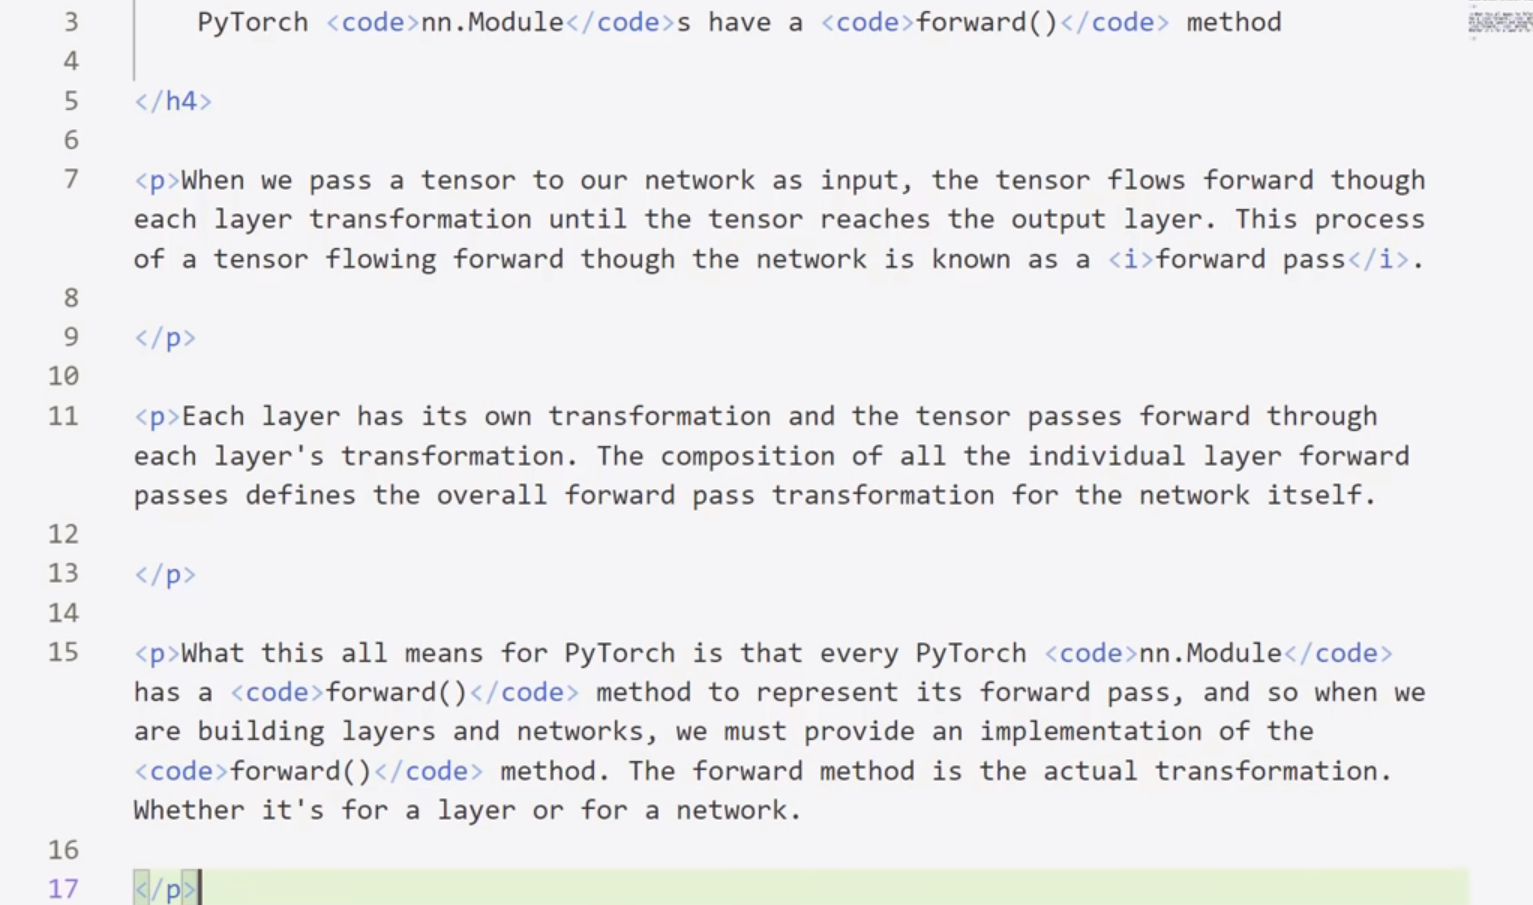

In [26]:
#very basics of nn
#we need to add line
class Network:
  def __init__(self):
    self.layer = None
  def forwardt(self,t):
    t = self.layer(t)
    return t
net = Network()
print(net)

In [27]:
class Network:
  def __init__(self):
    self.layer = None
  def forwardt(self,t):
    t = self.layer(t)
    return t
  def __repr__(self):
    return 'ananzaaa'
net = Network()
print(net)

ananzaaa


The `super()` builtin returns a proxy object, a substitute object that can call methods of the base class via delegation. This is called indirection (ability to reference base object with` super()`)


**Check the difference between print outputs**

In [28]:
#we changed the line 1(extend nn module) and 2(used super and define all functionality of nn in our class) 
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.layer = None
  def forwardt(self,t):
    t = self.layer(t)
    return t
net = Network()
print(net)

Network()


as an example below we should specify our type of parameters


*   paramaters
*   hyperparameters

hyperparameters are parameters that we choose manually and arbitrarily
for building a cnn layers  we should choosekernel size out_channels and out_features


1.   **kernel size**:stands for the setting the filter size, filter and kernel is interchangeable words for the situation.

2.  **out_channels** : number of filters (we can call them feature maps or in linear on called feature)


3.  **out_features** : set the size of output tensor

data depending of hyperparameters in that example is in_channels and out_feautures we should know our data with the input and how many classes or output do we need(number of labels is 10 for the example )


line 6 -- `self.fc1 = nn.Linear(in_features = 7*7*64, out_features= 256)`

here we see that our second conv layers output is 64 and where the hell this 7*7 comes from???




In [ ]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=5, padding=2)#as u can see here we can add stride also
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(in_features = 7*7*64, out_features= 256) #for linear layers there is a attributes called bias is autmaticaly given unless u assign as false
        self.fc2 = nn.Linear(in_features = 256, out_features = 10)

In [29]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net

net = 0

class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()
print(net)

NeuralNetwork()


In [30]:
assert isinstance(net, NeuralNetwork)

In [31]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    pass
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        pass


In [32]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [83]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
        

In [51]:
net

NeuralNetwork()

In [54]:
net = NeuralNetwork(16, 16, 16)
assert net.fc1
assert net.fc2
assert net.fc3
assert net.sigmoid

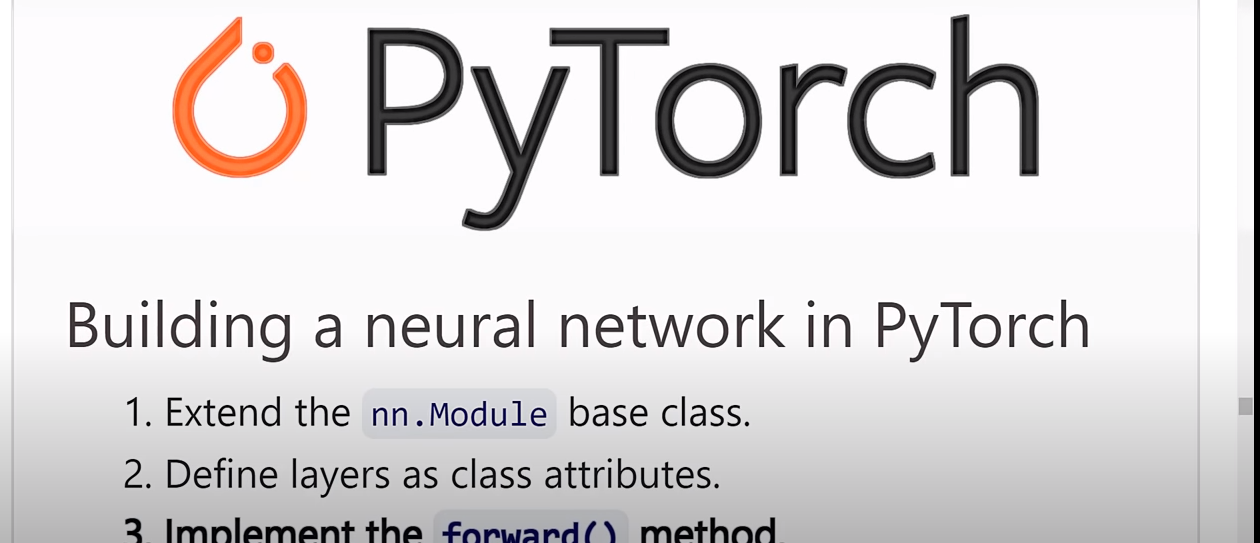

In [115]:
nett.conv1.weight.size()

torch.Size([30, 1, 4, 4])

In [110]:
nett.conv1 # trying some of the features of python

Conv2d(20, 30, kernel_size=(4, 4), stride=(1, 1))

In [239]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
df= pd.read_csv('data.csv', header = None)
df.head()
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook

In [240]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.conv1 = nn.Conv2d(input_dim,num_hidden1,kernel_size = 2)
        self.fc1 = nn.Linear(2, 55)
        self.fc2 = nn.Linear(55, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
      #for layer 1 
      #x = x.flatten()
      x = self.conv1(x)
      x = self.fc1(x)
      x = self.sigmoid(x)
      x = self.fc2(x)
      x = self.sigmoid(x)
      x = self.fc3(x)
      output = self.sigmoid(x)
      return output


In [241]:
# For training a model, use the following optimizer and loss
model  = NeuralNetworkk(10,40,80)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()


In [242]:
X  = torch.tensor(X).float()
y = torch.tensor(y).float()
type(X)

torch.Tensor

In [243]:
y_pred = model(X)
y_pred.size()

torch.Size([100, 1])

In [190]:
loss_value = loss(y_pred, y.reshape(100,-1))
print(f"Initial loss: {loss_value.item():.2f}")

Initial loss: 0.69


In [244]:
def torch_fit( num_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss_value = loss(y_pred, y.reshape(100,-1))
        print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        loss_value.backward()
        optimizer.step()
    return model

In [245]:
torch_fit(100)

Epoch 0, loss 0.69
Epoch 1, loss 0.72
Epoch 2, loss 0.69
Epoch 3, loss 0.70
Epoch 4, loss 0.70
Epoch 5, loss 0.68
Epoch 6, loss 0.68
Epoch 7, loss 0.68
Epoch 8, loss 0.68
Epoch 9, loss 0.68
Epoch 10, loss 0.67
Epoch 11, loss 0.67
Epoch 12, loss 0.67
Epoch 13, loss 0.66
Epoch 14, loss 0.66
Epoch 15, loss 0.65
Epoch 16, loss 0.64
Epoch 17, loss 0.64
Epoch 18, loss 0.63
Epoch 19, loss 0.62
Epoch 20, loss 0.61
Epoch 21, loss 0.60
Epoch 22, loss 0.59
Epoch 23, loss 0.58
Epoch 24, loss 0.56
Epoch 25, loss 0.55
Epoch 26, loss 0.53
Epoch 27, loss 0.51
Epoch 28, loss 0.49
Epoch 29, loss 0.47
Epoch 30, loss 0.44
Epoch 31, loss 0.42
Epoch 32, loss 0.39
Epoch 33, loss 0.37
Epoch 34, loss 0.35
Epoch 35, loss 0.32
Epoch 36, loss 0.30
Epoch 37, loss 0.28
Epoch 38, loss 0.26
Epoch 39, loss 0.24
Epoch 40, loss 0.22
Epoch 41, loss 0.21
Epoch 42, loss 0.20
Epoch 43, loss 0.19
Epoch 44, loss 0.18
Epoch 45, loss 0.17
Epoch 46, loss 0.16
Epoch 47, loss 0.16
Epoch 48, loss 0.15
Epoch 49, loss 0.15
Epoch 50, 

NeuralNetworkk(
  (fc1): Linear(in_features=2, out_features=55, bias=True)
  (fc2): Linear(in_features=55, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [227]:
class NeuralNetworkk(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        #self.conv1 = nn.Conv2d(input_dim,num_hidden1,kernel_size = 2)
        self.fc1 = nn.Linear(2, 55)
        self.fc2 = nn.Linear(55, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
      #for layer 1 
      #x = x.flatten()
      #x = self.conv1(x)
      x = self.fc1(x)
      x = self.sigmoid(x)
      x = self.fc2(x)
      x = self.sigmoid(x)
      x = self.fc3(x)
      output = self.sigmoid(x)
      return output

In [228]:
sample = np.random.rand(200,2)
yy = np.random.randint(0, 2, 200)
x_t = torch.tensor(sample).float()
y_t= torch.tensor(yy).float()
y_t = y_t.view(200,1) # view function is the same as reshape in numpy
nett = NeuralNetworkk(400, 800,1400)
y_p = nett(x_t)



loss_valuee= loss(y_p, y_t)
print(f"Initial loss: {loss_valuee.item():.2f}")

Initial loss: 0.69


In [ ]:
sample 

In [ ]:
nett.forward(x_t)

In [ ]:
y.reshape(100,-1)

In [152]:
nett.conv1.bias

Parameter containing:
tensor([-7.8375e-02,  6.0151e-02,  8.7281e-02,  5.2230e-05,  5.9257e-02,
        -1.8504e-02, -6.9917e-02,  5.2387e-02,  5.1704e-02, -6.9193e-02,
         8.6329e-02,  5.2908e-02,  8.3380e-02, -7.9039e-02, -7.3794e-02,
         6.2836e-02, -4.9033e-02,  6.4280e-02, -4.0272e-03,  3.1128e-02,
         5.4240e-02, -4.0770e-03,  2.8589e-02, -7.7256e-02, -4.4854e-02,
        -1.5460e-02,  9.7108e-03, -5.4752e-02, -3.7397e-02,  5.5061e-02],
       requires_grad=True)